In [1]:
#importing required libraries
from collections import Counter
import random
import math
import matplotlib.pyplot as plt

In [2]:
def generate_population(size, bits, children = [], population = []) : # generate initial population with the given size
    for i in range(size) :
        for j in range(bits) : # Traverse through list of list
            children.append(0) # Set initial population as 0 because it can exceed threshold otherwise
        population.append(children)
        children=[] # Reset after each individual is created and added 
    return population

In [3]:
def calculate_fitness(population,size,bits,weights,values,fitness,knapsack_threshold,total_weight=0,total_value=0) : 
    for i in range(size):
        for j in range(bits):
            if(population[i][j] == 1) : # Traverse through population and find bits which have value as 1
                total_weight += weights[j] # Summation of weight of each individual in the population
                total_value += values[j] # Summation of value of each individual in the population
        if(total_weight <= knapsack_threshold): # First fitness criteria to check whether the total weight exceeds ,aximum carrying capacity of the van
            fitness[i] = total_value 
        total_weight = total_value = 0
    return 0 # Fitness passed as reference so no return necessary

In [4]:
def tsp_path(dist_data,n,t):     
    comb = []
    dist = []
    for i in range (0,t):
        tmp = random.sample(range(2, n+2), n)
        tmp.insert(0,1)
        if tmp not in comb:
            comb.append(tmp)
    for j in range (0,len(comb)):
        a = comb[j]
        val = 0.0
        for k in range (0,len(a)-1):
            val += dist_data[a[k]][a[k+1]]
        dist.append(val)
    idx = dist.index(min(dist))
    return dist[idx],comb[idx]

In [5]:
def distance_calculation(nodes):
    dist = []
    for i in range (0,len(nodes)):
        distances = []
        for j in range (0,len(nodes)):
            if i == j :
                distances.append(0.0)
            else :
                val = math.sqrt(math.pow(nodes[i][1] - nodes[j][1], 2) + math.pow(nodes[i][2] - nodes[j][2], 2))
                distances.append(val)
        dist.append(distances)
    return dist  

In [6]:
def tournament(fitness,size,tournament_size):
    random_parents = random.sample(range(size),tournament_size) # Get random indices within size of population
    max_temp = -1
    for i in random_parents :
        if(fitness[i]>max_temp):
            max_temp = fitness[i] # Assign max fitness
            parent_index = i # Assign index of parent with max fitness
    return parent_index

In [7]:
def crossover(child_a,child_b,bits):
    locus = random.randint(1,bits) # Generate random point for crossover
    temp_list = child_a[locus-1:] # Swap bits of children from locus to end 
    child_a[locus-1:] = child_b[locus-1:]
    child_b[locus-1:] = temp_list
    return child_a,child_b

In [8]:
def mutation(child_a,child_b,bits,count) :
    for i in range(count):
        locus = random.randint(1,bits)
        child_a[locus-1] = random.randint(0, 1) # Randomly choose 0 or 1
        #child_a[locus-1] = 1 - child_a[locus-1] # For direct swapping 1 and 0, this logic can be used instead as needed
    for i in range(count):
        locus = random.randint(1,bits)
        child_b[locus-1] = random.randint(0, 1)
        #child_b[locus-1] = 1 - child_b[locus-1] # Direct swapping 
    return child_a,child_b

In [9]:
def individual_fitness(binary_set,weight_list,profit_list,knapsack_threshold):
    total_weight, total_value = 0,0
    for index,item in enumerate(binary_set):
        if(item == 1):
            total_weight += weight_list[index]
            total_value += profit_list[index]
    if(total_weight <= knapsack_threshold):
        return total_value
    else: 
        return 0

In [10]:
def replacement(child_1, child_2,fitness,initial_population,knapsack_threshold,weight_list,profit_list):
    child_1_fitness = individual_fitness(child_1,weight_list,profit_list,knapsack_threshold)
    child_2_fitness = individual_fitness(child_2,weight_list,profit_list,knapsack_threshold)
    if(child_1_fitness > min(fitness)):
        fitness[fitness.index(min(fitness))] = child_1_fitness
        initial_population[fitness.index(min(fitness))] = child_1
    if(child_2_fitness > min(fitness)):
        fitness[fitness.index(min(fitness))] = child_2_fitness
        initial_population[fitness.index(min(fitness))] = child_2
    return fitness

In [11]:
def order_of_cities(tsp_best_path,dist_data):
    distance_list = []
    for i,j in zip(range(0,len(tsp_best_path)-1),range(1,len(tsp_best_path))) :
        distance_list.append(dist_data[ tsp_best_path[i] ][ tsp_best_path[j] ])
    distance_list.append(dist_data[ 1 ][ tsp_best_path[len(tsp_best_path)-1] ])    
    return distance_list

In [12]:
def reshape(list1, list2):
    last = 0
    res = []
    for ele in list1:
        res.append(list2[last : last + len(ele)])
        last += len(ele)       
    return res

In [13]:
def list_manipulation(initial_population,fitness,bags_in_cities,weight_list,profit_list):
    best_child = initial_population[fitness.index(max(fitness))]
    temp_list = []
    temp_list_list = []
    weighted = []
    profits = []
    start = 0
    for i in bags_in_cities:
        for j in range(i):
            temp_list.append(0)
        temp_list_list.append(temp_list)
        temp_list = []
    for index,item in enumerate(best_child):
        if(item == 1):
            weighted.append(item*weight_list[index])
            profits.append(item*profit_list[index])
        else: 
            weighted.append(0)
            profits.append(0)
    return reshape(temp_list_list,best_child),reshape(temp_list_list,weighted),reshape(temp_list_list,profits)

In [14]:
def weight_order_calculation(comb,new_weight_list):
    tmp = []
    for i in comb:
        tmp.append(new_weight_list[comb.index(i)])
    return tmp     

In [15]:
def profit_order_calculation(comb,new_profit_list):
    tmp = []
    total_profit = 0
    for i in comb:
        tmp.append(new_profit_list[comb.index(i)])
    for i in tmp:
        total_profit += sum(i)
    return total_profit   

In [16]:
def time_calculation(max_speed,min_speed,weight_order,knapsack_threshold, individual_distances):
    time = 0
    maxSpeed = max_speed
    for index,item in enumerate(weight_order):
        node_weight = sum(weight_order[index])
        temp_velocity = 1 - ((max_speed*(node_weight/knapsack_threshold))* min_speed)
        time += (individual_distances[index] /maxSpeed )
    return time

In [17]:
a = [*range(0,20,1)]
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [18]:
def main():
    content_list = []
    textfile = open("dataset/whole_data_set.txt") # getting data from the file
    for i in textfile :
        content_list.append(i.split())

    number_of_cities = int(content_list[0][3]) + 1 # total number of cities
    knapsack_threshold = int(content_list[1][3])  # threshold value
    min_speed = float(content_list[2][2])        # minimum speed
    max_speed = float(content_list[3][2])       # maximum speed
    del content_list[0:7]                     
    node_list = []                            
    for i in range(number_of_cities):
        node_list.append([eval(j) for j in content_list[i]])  # list of node's coordinates
    del content_list[0:number_of_cities+1]

    profit_list = []
    weight_list = []
    city = []

    for i in content_list:
        profit_list.append(int(i[1]))         #profits of each bags in the nodes 
        weight_list.append(int(i[2]))         # weights of individual bags
        city.append(int(i[3]))                # nodes details
    
    tsp_population = int(input("Enter the number of trials for TSP to check - ")) #dynamic population as per user for tsp
    population_size = int(input("Enter number of population for weight from cities- ")) # population size for knapsack part
    tournament_size = int(input("Enter tournament size - ")) # tournament size 
    cross = input("\n Do you want to perform crossover? Y or N ")
    mutations = int(input("Enter the mutation rate - "))   # mutation size
    trials = int(input("Enter the trials you want to run"))
    iterations = int(input("Enter the number of iterations required")) # number of iterations required for comparison
    
    dist_data = distance_calculation(node_list)  #distance between all nodes
    # sorting weights and profits in order of cities
    city, weight_list, profit_list = (list(t) for t in zip(*sorted(zip(city, weight_list, profit_list)))) 
    bags_in_cities = list(dict(Counter(city)).values()) # listing of number of bags per city
    total_bags = sum(bags_in_cities) # total bags value
    
    best_dist = []               # array of best distances of all trials
    best_comb = []               # array of best cities combinations of all trials of tsp
    profit_fit = []             # array of profits
    best_fit = []              # best fitness array from all trials
    best_time = []              # total time taken array for all trials
    for k in range (trials):
        random.seed(k)
        dist, comb = tsp_path(dist_data,number_of_cities - 2,tsp_population)   # distance matrix and path of tsp output 
        best_dist.append(dist) 
        best_comb.append(comb)
        fitness=[]
        initial_population = []
        initial_population = generate_population(population_size,total_bags) # initial population generation
        for j in range(population_size):
            fitness.append(0)                                    # fitness generation for the population
        calculate_fitness(initial_population,population_size,total_bags,weight_list,profit_list,fitness,knapsack_threshold) # calculating fitness
        for i in range(iterations): 
            winner_a = tournament(fitness,population_size,tournament_size) # 1st winner after tournament
            winner_b = tournament(fitness,population_size,tournament_size)  # 2nd wuinner after tournament
            if cross == 'y' or cross == 'Y' or cross == 'yes' or cross == 'Yes' or cross == 'YES':
                child_a,child_b = crossover(initial_population[winner_a].copy(),initial_population[winner_b].copy(),total_bags) # Obtain children from crossover, lists copied over so origial
            else:
                child_a = initial_population[winner_a].copy()                       # continuing with new generation without crossover 
                child_b = initial_population[winner_b].copy()                       
            mutated_a,mutated_b = mutation(child_a,child_b,total_bags,mutations) #  mutated children
            replacement(mutated_a,mutated_b,fitness,initial_population,knapsack_threshold,weight_list,profit_list) # replacement of new children with worst population
            best_fit.append(max(fitness))
        itr = [*range(0,iterations,1)]
        #plt.plot(itr, best_fit, label = 'TRIAL'+ str(k)+' | Maximum Fitness:' +str(max(best_fit)))
        #plt.scatter(iterations,max(best_fit))
        #plt.title('Population '+str(population_size) +'|Mutation rate '+str(mutations))
        #plt.xlabel('Iterations')
        #plt.ylabel('Fitness')
        #plt.legend()
        
        #for pareto
        
        
        best_fit.clear()
        itr.clear()
        individual_distances = order_of_cities(comb,dist_data) 
        knapsack_list,new_weight_list,new_profit_list = list_manipulation(initial_population,fitness,bags_in_cities,weight_list,profit_list)
        weight_order = weight_order_calculation(comb,new_weight_list)
        total_profit = profit_order_calculation(comb,new_profit_list) # total profit calculation
        profit_fit.append(total_profit)
        total_time = time_calculation(max_speed,min_speed,weight_order,knapsack_threshold, individual_distances)
        best_time.append(total_time)
        fitness.clear()
        initial_population.clear()
    #plt.show()
    plt.scatter(profit_fit, best_time,label = 'TRIAL'+ str(k+1), color = 'slateblue')
    plt.title('ITERATIONS '+str(trials) +'|TSP POPULATION '+str(tsp_population))
    plt.xlabel('PROFIT')
    plt.ylabel('TIME')
    #plt.legend()
    plt.show()
    plt.scatter(best_time,best_dist, label = 'TRIAL'+ str(k+1), color = 'crimson')
    plt.title('ITERATIONS '+str(trials) +'|TSP POPULATION '+str(tsp_population))
    plt.xlabel('TIME')
    plt.ylabel('DISTANCE')
    #plt.legend()
    plt.show()
    print('distances ', best_dist)
    #print('combinations ', best_comb)
    print('profits ', profit_fit)
    print('fitness ', best_fit)
    print('time ', best_time)


Enter the number of trials for TSP to check - 5
Enter number of population for weight from cities- 10
Enter tournament size - 2

 Do you want to perform crossover? Y or N y
Enter the mutation rate - 1
Enter the trials you want to run100
Enter the number of iterations required100


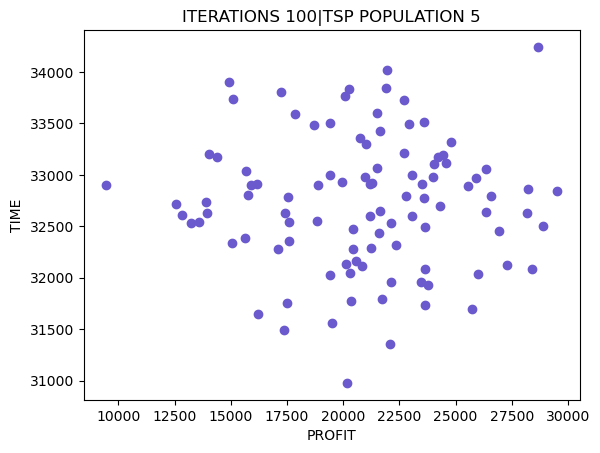

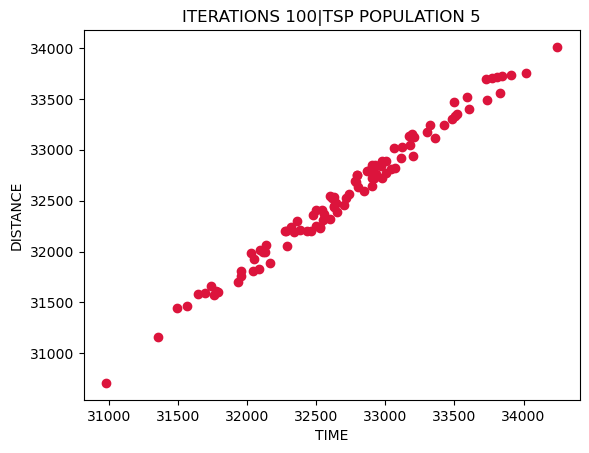

distances  [32852.08531027753, 32541.29427797708, 31698.26994053669, 32060.051841809593, 32531.798183094572, 32203.346851152462, 32198.51968870217, 32314.622415760383, 32202.83056486934, 33723.214625042085, 33154.08985737359, 32527.669350041026, 32919.50692569187, 32852.12444470764, 34010.00483620003, 31657.77677499788, 32721.40369237503, 33328.346179683926, 33400.52408705607, 32757.879922505268, 31572.136503021233, 31810.019242687376, 33047.01442517354, 33130.07608404409, 33298.73158574791, 31988.87556918314, 31461.755769694195, 32755.185872771686, 33729.359948708996, 33485.06089486049, 32442.302257114152, 32243.995949968794, 30709.06587654586, 32295.034757028086, 32390.888177090208, 32806.43902915228, 33244.71684103288, 33351.06182400291, 32786.989598758824, 32362.73189636784, 32052.62310921266, 33028.18818297245, 32205.681300505643, 32369.91224693523, 32756.141955310995, 31812.739870567515, 33123.80268221706, 32718.568666359115, 32641.416249242193, 33520.29493622152, 32246.319178141

In [19]:
print(main())

Enter the number of trials for TSP to check - 10
Enter number of population for weight from cities- 100
Enter tournament size - 2

 Do you want to perform crossover? Y or N y
Enter the mutation rate - 1
Enter the trials you want to run100
Enter the number of iterations required1000


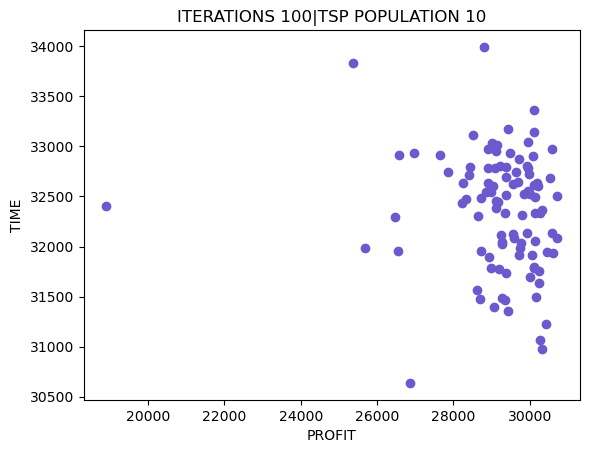

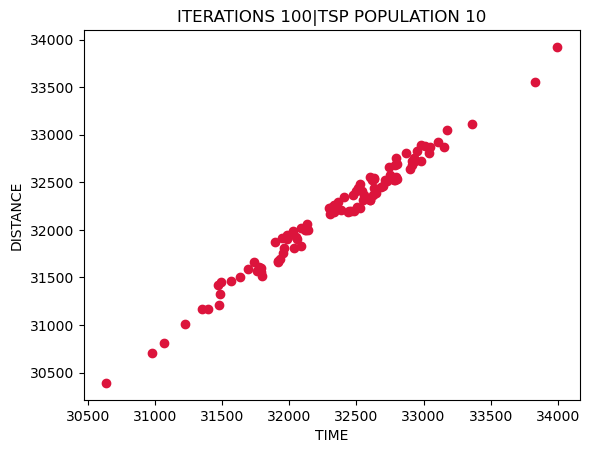

distances  [32368.043678751175, 32480.18190882985, 31698.26994053669, 32060.051841809593, 32531.798183094572, 31659.05191125862, 31917.9199053769, 32314.622415760383, 32202.83056486934, 32824.995662692534, 31554.692790537905, 32527.669350041026, 32919.50692569187, 32191.4465424548, 33923.96730000267, 31657.77677499788, 32721.40369237503, 32721.806059244223, 31009.729489695124, 32757.879922505268, 31572.136503021233, 31810.019242687376, 33047.01442517354, 32697.18277310516, 32262.594583367365, 31988.87556918314, 31461.755769694195, 32344.48535490334, 32524.747834015227, 32658.301032680945, 31903.454424246054, 31214.791163286536, 30709.06587654586, 32295.034757028086, 32390.888177090208, 32806.43902915228, 32518.43416288093, 32554.106043153555, 30809.885471397676, 32362.73189636784, 32001.104992414097, 32807.19134402625, 32167.800457708472, 32369.91224693523, 32756.141955310995, 31812.739870567515, 32539.338932990526, 32231.994718465066, 32641.416249242193, 32319.187010638212, 32192.9118

In [21]:
print(main())  # trial 1